In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
from re import sub
from decimal import Decimal


In [136]:
df = pd.read_csv('../../ML/car-sense-Analytics/car_dataset.csv')


In [137]:
def normalize_segments(raw_segment):
    segments = dict(
        city_values = ['Ciudad'],
        sed_s_values = ['Sedan-SmallSize'],
        sed_m_values = ['Sedan-MidSize', 'Sedan/MidSize/Hybrid'],
        sed_f_values = ['Sedan-FullSize','Sedan-Fullsize*', 'Sedan-FullSize/Hybrid', 'Sedan-Fullsize'],
        suv_s_values = ['SUV-City', 'SUV-SmallSize'],
        suv_m_values = ['SUV-MidSize'] ,
        suv_f_values = ['SUV-Fullsize', 'SUV-Fullsize/Hybrid', 'SUV-FullSize'],
        suv_xl_values = ['SUV-ExtendedSize','SUV-ExtendedSize/Hybrid'],
        pu_s_values = ['Pickup-SmallSize'],
        pu_m_values = ['Pickup-MidSize'],
        pu_f_values = ['Pickup-FullSize/Hybrid', 'Pickup-FullSize'],
        mini_van_values = ['MiniVan', 'MiniVan/Hybrid']
        
    )
    for k, values in segments.items():
        try:
            if values.index(raw_segment) >= 0:
                return k[:-7]
        except ValueError:
            continue
    
    print('raw_segment: [{}]not found.'.format(raw_segment))
    return 'Not found'
    
df['segment_normalized'] = df['segment'].apply(normalize_segments)

In [138]:
def category_classifer(raw_segment):
    segments = dict(
        city_values = ['Ciudad'],
        sedan_values = [
            'Sedan-SmallSize', 'Sedan-MidSize', 'Sedan/MidSize/Hybrid', 
            'Sedan-FullSize','Sedan-Fullsize*', 'Sedan-FullSize/Hybrid', 'Sedan-Fullsize'
        ],
       
        suv_values = [
            'SUV-City', 'SUV-SmallSize', 'SUV-MidSize', 
            'SUV-Fullsize', 'SUV-Fullsize/Hybrid', 
            'SUV-FullSize','SUV-ExtendedSize', 'SUV-ExtendedSize/Hybrid'
        ],
       
        pu_values = ['Pickup-SmallSize', 'Pickup-MidSize', 'Pickup-FullSize/Hybrid', 'Pickup-FullSize', ],
        mini_van_values = ['MiniVan', 'MiniVan/Hybrid']
        
    )
    for k, values in segments.items():
        try:
            if values.index(raw_segment) >= 0:
                return k[:-7]
        except ValueError:
            continue
    
    print('category: [{}]not found.'.format(raw_segment))
    return 'Not found'

df['category'] = df['segment'].apply(category_classifer)


In [139]:
def ground_category(raw_segment):
    segments = dict(
        city_values = ['Ciudad'],
        sedan_values = [
            'Sedan-SmallSize', 'Sedan-MidSize', 'Sedan/MidSize/Hybrid', 
            'Sedan-FullSize','Sedan-Fullsize*', 'Sedan-FullSize/Hybrid', 'Sedan-Fullsize'
        ],
       
        suv_values = [
            'SUV-City', 'SUV-SmallSize', 'SUV-MidSize', 
            'SUV-Fullsize', 'SUV-Fullsize/Hybrid', 
            'SUV-FullSize','SUV-ExtendedSize', 'SUV-ExtendedSize/Hybrid'
        ],
       
        pu_values = ['Pickup-SmallSize', 'Pickup-MidSize', 'Pickup-FullSize/Hybrid', 'Pickup-FullSize', ],
        mini_van_values = ['MiniVan', 'MiniVan/Hybrid']
        
    )
    for k, values in segments.items():
        try:
            if values.index(raw_segment) >= 0:
                return k[:-7]
        except ValueError:
            continue
    
    print('category: [{}]not found.'.format(raw_segment))
    return 'Not found'

df['category'] = df['segment'].apply(category_classifer)

In [140]:

main_columns = ['brand', 'model']
filtered_df = df[df['dist_axis'].isna()]

df_groupby = df.groupby(['segment_normalized'])['dist_axis'].mean()




print('dist_axis missing values: {}'.format(df['dist_axis'].isnull().sum()))

def fill_missing_dist_axis(row):
    if np.isnan(row['dist_axis']):
        return df_groupby[row['segment_normalized']]
    else:
        return row['dist_axis']



df['dist_axis'] = df.apply(lambda row: fill_missing_dist_axis(row), axis=1)

print('dist_axis missing values: {}'.format(df['dist_axis'].isnull().sum()))
df['dist_axis'] 

dist_axis missing values: 0
dist_axis missing values: 0


0     2.60
1     2.70
2     2.80
3     2.50
4     2.60
      ... 
87    2.77
88    2.77
89    2.81
90    2.90
91    2.27
Name: dist_axis, Length: 92, dtype: float64

/Users/luisbarreras/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

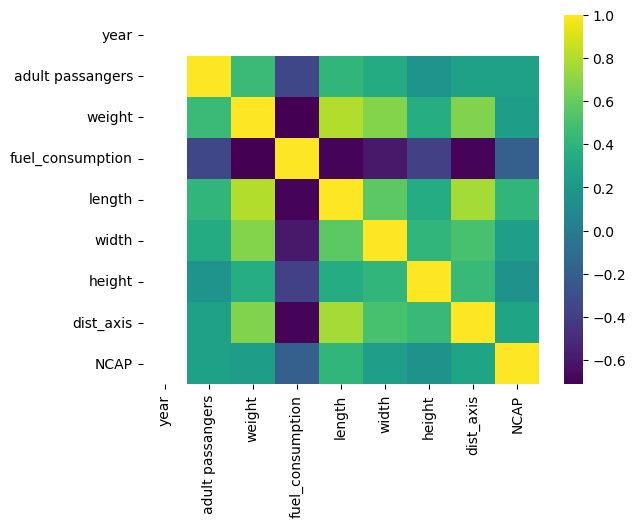

In [141]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

## Transformations of data

In [144]:


df['max_price'] = df['max'].apply(lambda x:Decimal(sub(r'[^\d.]', '', x) ))
df['min_price'] = df['min'].apply(lambda x:Decimal(sub(r'[^\d.]', '', x) ))
df['trunk_size_number'] = df['trunk_size'].apply(lambda x:Decimal(sub(r'[^\d.]', '', x) ))
df['transmission_automatic'] = df['transmission'].apply(lambda x: 1 if 'A' in x else 0)

df['weight_number'] = df['weight'].apply(lambda x:Decimal(sub(r'[^\d.]', '', str(x)) ))
df['tank_number'] = df['tank'].apply(lambda x:Decimal(sub(r'[^\d.]', '', str(x)) ))

cast_boolean = lambda x: 1 if x == 'yes' else 0

# Yes/No Columns
df['cruise_control_advanced'] = df['cruise_control_advanced'].apply(cast_boolean)
df['cruise_control'] = df['cruise_control'].apply(cast_boolean)
df['blind_spot_alert'] = df['blind_spot_alert'].apply(cast_boolean)

df['rain_sensor'] = df['rain_sensor'].apply(cast_boolean)
df['car_tow'] = df['car_tow'].apply(cast_boolean)
df['car_pull'] = df['car_pull'].apply(cast_boolean)
df['rain_sensor'] = df['rain_sensor'].apply(cast_boolean)

In [145]:
# df['height_to_the ground_number'] = df['height_to_the ground']

def cast_height_to_ground(ground):
    value = ground.split('/')[0]
    switcher = {
        'normal': 0,
        'high': 1,
        'extra_high': 2
    }

    return switcher.get(value)

df['ground_clearance'] = df['height_to_the ground'].apply(cast_height_to_ground)


In [147]:
# Delete columns not needed
df = df.drop(columns=[
    'body_type', 'segment', 'category', 'max', 'min', 'transmission', 'brand', 'model', 'year', 'weight', 'trunk_size',
    'front_break', 'rear_break', 'braking_assists', 'fuel',
    '4x4/awd', 'big_volume_cargo', 'height_to_the ground', 'tank',
     'front_airbags',	'side_airbags',	'curtain_air_bags',	'knee_air_bags',
    'tire_pressure_monitor', 'emergency_brake',	'reverse_camera','camera_360',
    'bluetooth',
    'android_auto/apple+play'
    ],
errors='ignore')

 

df.head()

,adult passangers,fuel_consumption,length,width,height,dist_axis,NCAP,cruise_control,cruise_control_advanced,blind_spot_alert,...,car_tow,car_pull,segment_normalized,max_price,min_price,trunk_size_number,transmission_automatic,weight_number,tank_number,ground_clearance
0,5,20.0,4.4,1.60,1.4,2.6,5,0,0,0,...,0,0,sed_s,388700,312800,475,1,1035,40,0
1,5,18.0,4.6,1.78,1.4,2.7,5,0,0,0,...,0,0,sed_m,529900,419900,361,1,1405,50,0
2,5,18.0,4.8,1.80,1.4,2.8,5,0,0,0,...,0,0,sed_f,598800,571900,427,1,1515,60.6,0
3,5,19.0,4.0,1.70,1.6,2.5,5,0,0,0,...,0,0,suv_s,400000,378400,369,1,1035,36,1
4,5,20.0,4.4,1.82,1.6,2.6,5,0,0,0,...,0,0,suv_m,528700,528700,500,1,1425,47,1


In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_columns = ['adult passangers', 'weight_number', 'fuel_consumption', 'trunk_size_number', 'length',
                    'min_price', 'max_price', 'width', 'height', 'dist_axis', 'ground_clearance', 'NCAP', 'tank_number',
                  ]
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head(10)



,adult passangers,fuel_consumption,length,width,height,dist_axis,NCAP,cruise_control,cruise_control_advanced,blind_spot_alert,...,car_tow,car_pull,segment_normalized,max_price,min_price,trunk_size_number,transmission_automatic,weight_number,tank_number,ground_clearance
0,0.5,0.599604,0.285714,0.000000,0.046243,0.150685,1.0,0,0,0,...,0,0,sed_s,0.055910,0.026306,0.176381,1,0.007816,0.046512,0.0
1,0.5,0.500496,0.380952,0.233766,0.046243,0.196347,1.0,0,0,0,...,0,0,sed_m,0.135014,0.092133,0.118601,1,0.160016,0.162791,0.0
2,0.5,0.500496,0.476190,0.259740,0.046243,0.242009,1.0,0,0,0,...,0,0,sed_f,0.173613,0.185556,0.152053,1,0.205265,0.286047,0.0
3,0.5,0.550050,0.095238,0.129870,0.104046,0.105023,1.0,0,0,0,...,0,0,suv_s,0.062241,0.066626,0.122656,1,0.007816,0.000000,0.5
4,0.5,0.599604,0.285714,0.285714,0.104046,0.150685,1.0,0,0,0,...,0,0,suv_m,0.134342,0.159004,0.189052,1,0.168244,0.127907,0.5
5,0.5,0.450942,0.380952,0.337662,0.104046,0.150685,1.0,0,0,0,...,0,0,suv_f,0.245882,0.179963,0.237202,1,0.279309,0.220930,0.5
6,1.0,0.351833,0.523810,0.389610,0.132948,0.264840,1.0,0,0,0,...,0,0,suv_xl,0.400840,0.374554,0.318297,1,0.404772,0.337209,0.5
7,1.0,0.104063,0.666667,0.519481,0.161850,0.378995,1.0,0,0,0,...,0,0,suv_xl,0.786947,0.785925,0.341105,1,0.713287,0.569767,0.5
8,0.5,0.153617,0.666667,0.259740,0.161850,0.333333,1.0,0,0,0,...,0,0,pu_m,0.195854,0.163122,0.442473,1,0.328671,0.511628,1.0
9,0.5,0.104063,0.761905,0.389610,0.161850,0.470320,1.0,0,0,0,...,0,0,pu_m,0.381513,0.307253,0.442473,1,0.390374,0.383721,1.0


In [150]:
df.columns

Index(['adult passangers', 'fuel_consumption', 'length', 'width', 'height',
       'dist_axis', 'NCAP', 'cruise_control', 'cruise_control_advanced',
       'blind_spot_alert', 'rain_sensor', 'car_tow', 'car_pull',
       'segment_normalized', 'max_price', 'min_price', 'trunk_size_number',
       'transmission_automatic', 'weight_number', 'tank_number',
       'ground_clearance'],
      dtype='object')

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## SGD Classifier

In [152]:
df_suv_sedan = df[df['segment_normalized'].isin(['sed_s', 'sed_m', 'sed_f', 'suv_s', 'suv_m', 'suv_f', 'suv_xl'])]
df_suv_sedan
X = df_suv_sedan.drop(columns=[
    'segment_normalized'
    ])



X.fillna(0, inplace=True)
X


,adult passangers,fuel_consumption,length,width,height,dist_axis,NCAP,cruise_control,cruise_control_advanced,blind_spot_alert,rain_sensor,car_tow,car_pull,max_price,min_price,trunk_size_number,transmission_automatic,weight_number,tank_number,ground_clearance
0,0.500000,0.599604,0.285714,0.000000,0.046243,0.150685,1.0,0,0,0,0,0,0,0.055910,0.026306,0.176381,1,0.007816,0.046512,0.0
1,0.500000,0.500496,0.380952,0.233766,0.046243,0.196347,1.0,0,0,0,0,0,0,0.135014,0.092133,0.118601,1,0.160016,0.162791,0.0
2,0.500000,0.500496,0.476190,0.259740,0.046243,0.242009,1.0,0,0,0,0,0,0,0.173613,0.185556,0.152053,1,0.205265,0.286047,0.0
3,0.500000,0.550050,0.095238,0.129870,0.104046,0.105023,1.0,0,0,0,0,0,0,0.062241,0.066626,0.122656,1,0.007816,0.000000,0.5
4,0.500000,0.599604,0.285714,0.285714,0.104046,0.150685,1.0,0,0,0,0,0,0,0.134342,0.159004,0.189052,1,0.168244,0.127907,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.500000,0.332012,0.409524,0.337662,0.121387,0.228311,1.0,0,0,0,0,0,0,0.171429,0.296804,0.189052,1,0.215549,0.209302,0.5
88,0.500000,0.782953,0.409524,0.337662,0.121387,0.228311,1.0,0,0,0,0,0,0,0.327171,0.370559,0.279777,1,0.278075,0.186047,0.5
89,0.833333,0.362735,0.480952,0.389610,0.130058,0.246575,1.0,0,0,0,0,0,0,0.298599,0.440012,0.279777,1,0.315508,0.360465,0.5
90,0.833333,0.169970,0.571429,0.480519,0.150289,0.287671,1.0,0,0,0,0,0,0,0.504762,0.565396,0.279777,1,0.419580,0.406977,0.5


In [153]:
y = df_suv_sedan['segment_normalized']
y

0      sed_s
1      sed_m
2      sed_f
3      suv_s
4      suv_m
       ...  
87     suv_f
88     suv_f
89    suv_xl
90    suv_xl
91     suv_m
Name: segment_normalized, Length: 69, dtype: object

In [154]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


In [155]:
print('X_train: {0})'.format(X_train))

X_train:     adult passangers  fuel_consumption    length     width    height  \
45          0.500000          0.302279  0.380952  0.259740  0.104046   
55          0.500000          0.267592  0.438095  0.584416  0.109827   
34          1.000000          0.054509  0.738571  0.594805  0.198555   
7           1.000000          0.104063  0.666667  0.519481  0.161850   
84          0.500000          0.474232  0.147619  0.246753  0.115607   
53          0.500000          0.287413  0.366667  0.662338  0.127168   
69          0.500000          0.436075  0.219048  0.194805  0.072254   
59          0.500000          0.203171  0.480952  0.428571  0.176301   
25          0.500000          0.599604  0.328571  0.064935  0.072254   
75          0.500000          0.441031  0.185714  0.207792  0.092486   
52          0.500000          0.465808  0.223810  0.571429  0.086705   
31          0.500000          0.480674  0.350952  0.289610  0.092486   
51          0.500000          0.361744  0.309524  0.545

In [156]:
print('y_train: {0}'.format(y_train))

y_train: 45     suv_m
55     suv_f
34    suv_xl
7     suv_xl
84     suv_s
53     suv_m
69     suv_s
59    suv_xl
25     sed_s
75     suv_s
52     suv_s
31     suv_m
51     sed_s
17     sed_f
65     suv_f
3      suv_s
21     suv_f
10     suv_m
74    suv_xl
6     suv_xl
48     sed_s
86     suv_m
90    suv_xl
19     suv_m
33     suv_f
54     suv_s
32    suv_xl
62    suv_xl
30     suv_f
81     sed_m
85     suv_s
15     sed_m
43     sed_f
88     suv_f
89    suv_xl
50     sed_m
35    suv_xl
56    suv_xl
87     suv_f
1      sed_m
72     suv_s
27     sed_m
2      sed_f
29     suv_s
26     sed_s
83     sed_m
18     suv_m
71     suv_m
Name: segment_normalized, dtype: object


In [157]:
# Create classifier
clf = SGDClassifier(loss='log_loss', alpha=0.01,
                    max_iter=1000)

In [158]:
# Train the classifier
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='log_loss')

In [159]:
# Make predictions
y_pred = clf.predict(X_test)
y_pred

array(['suv_s', 'sed_m', 'suv_f', 'suv_s', 'suv_xl', 'suv_xl', 'sed_m',
       'suv_s', 'suv_xl', 'sed_m', 'sed_m', 'sed_m', 'sed_m', 'suv_m',
       'suv_s', 'sed_s', 'sed_m', 'suv_xl', 'sed_m', 'suv_xl', 'suv_m'],
      dtype='<U6')

In [160]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.42857142857142855


In [161]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       sed_f       0.00      0.00      0.00         2
       sed_m       0.62      1.00      0.77         5
       sed_s       1.00      0.50      0.67         2
       suv_f       0.00      0.00      0.00         5
       suv_m       0.00      0.00      0.00         4
       suv_s       0.25      1.00      0.40         1
      suv_xl       0.40      1.00      0.57         2

    accuracy                           0.43        21
   macro avg       0.33      0.50      0.34        21
weighted avg       0.29      0.43      0.32        21



/Users/luisbarreras/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luisbarreras/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luisbarreras/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
